In [103]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely import wkt

In [46]:
city = pd.read_csv('../data/city.csv')

In [53]:
mugs = pd.read_csv('../data/original/mugs.csv')

In [56]:
city = city.assign(geometry = city.geometry.map(wkt.loads))
mugs = mugs.assign(geometry = mugs.geometry.map(wkt.loads))

In [169]:
def assign_crime(bounds, crime):
    assigned = []
    
    for bound in bounds:
        print(len(crime))
        if len(crime) == 0:
            assigned.push(0)
        result = [i for i, point in enumerate(crime) if _isinside(bound, point)]
        assigned.append(len(result))
        crime = np.delete(crime, result, 0)
    
    return assigned
        

def _isinside(bounds, point):
    (minx, miny, maxx, maxy), (x, y) = (bounds, point)
    return minx <= x < maxx and miny <= y < maxy

In [ ]:
crime = assign_crime(city.geometry.map(lambda x: x.bounds).tolist(),
                     mugs.geometry.map(lambda x: x.coords[0]).tolist())

In [143]:
city = city.assign(mugs = crime,
                   cens = city.mugs.apply(lambda x: 1 if x == 0 else 0))

In [171]:
city = city.assign(cens = city.mugs.apply(lambda x: 1 if x == 0 else 0))

In [164]:
geocity = gpd.GeoDataFrame(city)

In [165]:
geomugs = gpd.GeoDataFrame(mugs)

In [147]:
import matplotlib.pyplot as plt

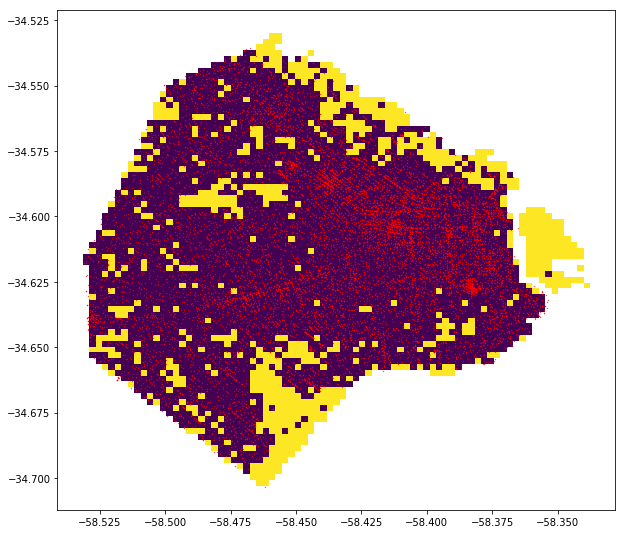

In [166]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
geocity.plot(column='empty', ax=ax)
geomugs.plot(markersize=0.1, color='red', ax=ax)

In [175]:
city.to_csv('../data/city.csv', index=False)

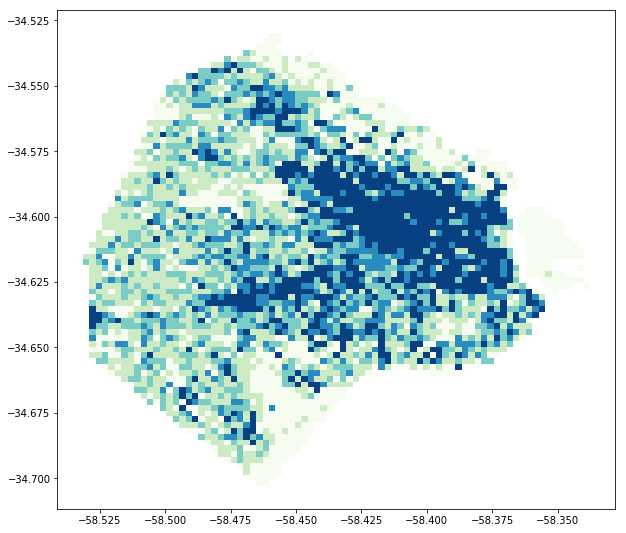

In [181]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
geocity.plot(column='mugs', cmap='GnBu', scheme='quantiles', ax=ax)